# Project Domain

**Background:**

This project aims to predict gold prices using machine learning techniques. Gold prices are known to be highly volatile and influenced by various economic and political factors. Therefore, having an accurate prediction model can help investors and market analysts make better decisions.

---

**Why and How This Problem Should Be Solved:**

The issue of gold price fluctuation needs to be addressed because it can affect economic stability and investment decisions. By using machine learning models, we can analyze historical data and the factors influencing gold prices to make more accurate predictions. This will help reduce risks and increase profits for investors.

---

**Related Research or References:**

- DigitalOcean. "Using `StandardScaler()` Function to Standardize Python Data" Available at [DigitalOcean](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

- scikit-learn. "StandardScaler" Available at [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

- Shah, I., & Pachanekar, R. (2021). Gold Price Prediction Using Machine Learning In Python. Retrieved from [QuantInsti](https://blog.quantinsti.com/gold-price-prediction-using-machine-learning-python/).

- Youssef, M. (2021). Gold Price Prediction Using Random Forest. Retrieved from [GitHub](https://github.com/MYoussef885/Gold_Price_Prediction).
- Pendry, P. S. (2021). Gold Price Prediction using Random Forest. Retrieved from [GitHub](https://github.com/pavansaipendry/Gold-Price-Prediction).

- Ben Jabeur, S., Mefteh-Wali, S., & Viviani, J. L. (2021). Forecasting gold price with the XGBoost algorithm and SHAP interaction values. *Annals of Operations Research*, 334, 679-699. Retrieved from [Springer](https://link.springer.com/article/10.1007/s10479-021-04187-w).
- Theja, A. (2021). Gold Price Prediction Using XGBoost. Retrieved from [GitHub](https://github.com/abhijantheja/gold_predictor).

- GeeksforGeeks. "Gold Price Prediction using Machine Learning." Available at [GeeksforGeeks](https://www.geeksforgeeks.org/gold-price-prediction-using-machine-learning/).

- Analytics Vidhya. "Building A Gold Price Prediction Model Using Machine Learning" Available at [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/07/building-a-gold-price-prediction-model-using-machine-learning/).

# 1. Business Understanding

## A. Problem Statements

- Volatility of Gold Prices: The price of gold is highly volatile and changes rapidly over time. This unpredictability makes it challenging for investors and analysts to make informed decisions about buying or selling gold.

- Data Complexity: The dataset used for predicting gold prices includes multiple variables such as SPX, GLD, USO, SLV, and EUR/USD. Handling and preprocessing this complex data to make it suitable for model training is a significant challenge.

## B. Goals

- Accurate Prediction: The primary goal of the project is to develop a machine learning model that can accurately predict the price of gold per unit. This involves analyzing historical data and identifying patterns that can help forecast future prices.

- Model Deployment: Another goal is to deploy the trained model so that it can be used in real-time to predict gold prices. This includes saving the model using tools like Pickle and integrating it with a web framework for live predictions.

## C. Solution Statement

- Data Preprocessing: This includes handling missing values, normalizing data, and removing outliers to ensure the dataset is clean and suitable for model training.

- Model Development and Deployment: Various machine learning models such as Lasso Regression, RandomForestRegressor, and XGBoost are used to train on the dataset. The best-performing model is then deployed using Pickle for real-time predictions.

# 2. Importing Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid", {"grid.color": ".6",
                           "grid.linestyle": ":"})

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# 3. Data Loading

In [2]:
url = "https://github.com/ridwaanhall/applied-machine-learning/raw/refs/heads/main/predictive-analytics/data/gold_price_data.csv"
gold_price = pd.read_csv(url, parse_dates=["Date"])
gold_price

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118


From the data above, it can be seen that there are 6 variables with a total of 2,290 observations.

# 4. Data Understanding

## A. The Number of Each Variable and Its Type.

In [3]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


The dataset contains 2290 entries with 6 columns: `Date`, `SPX`, `GLD`, `USO`, `SLV`, and `EUR/USD`. All columns have non-null values. The `Date` column is of type `object` and should be converted to `datetime` for better analysis. The other columns are of type `float64`.

## B. Variable Descriptions

Meanings of each variable:

| Variable | Note                                      | Example Value |
|----------|-------------------------------------------|---------------|
| Date     | The date of the recorded data             | 2024-11-21    |
| SPX      | S&P 500 index value                       | 4500.25       |
| GLD      | Gold price                                | 1800.50       |
| USO      | Crude oil price (United States Oil Fund)  | 55.75         |
| SLV      | Silver price (iShares Silver Trust)       | 24.30         |
| EUR/USD  | Exchange rate between Euro and US Dollar  | 1.12          |


## C. Statistical Data Description.

Next, we will look at the statistical description of the data we have

In [4]:
gold_price.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


- The dataset contains 2290 entries for each variable.
- The `Date` column should be converted from `object` to `datetime` for better analysis.
- The `SPX`, `GLD`, `USO`, `SLV`, and `EUR/USD` columns are all of type `float64`.
- No missing values are present in the dataset.
- The `GLD` column (gold price) has a mean of 122.73 and a standard deviation of 23.28.
- The `USO` column (crude oil price) has a wide range, with a minimum of 7.96 and a maximum of 117.48, indicating high volatility.
- The `EUR/USD` exchange rate ranges from 1.039 to 1.599, with a mean of 1.284.


# 5. Data Cleaning

## A. Handle Missing value

Pertama, kita akan memeriksa apakah ada nilai 0 pada kolom `x`, `y`, `z`.

In [5]:
gold_price.isna().sum().sort_values(ascending=False)

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


- No missing values in any of the columns.
- All columns (`Date`, `SPX`, `GLD`, `USO`, `SLV`, `EUR/USD`) have complete data.


## B. Correlation Between Columns

If two or more columns are correlated with each other and none of them is a target variable, then we must use a method to remove this correlation.

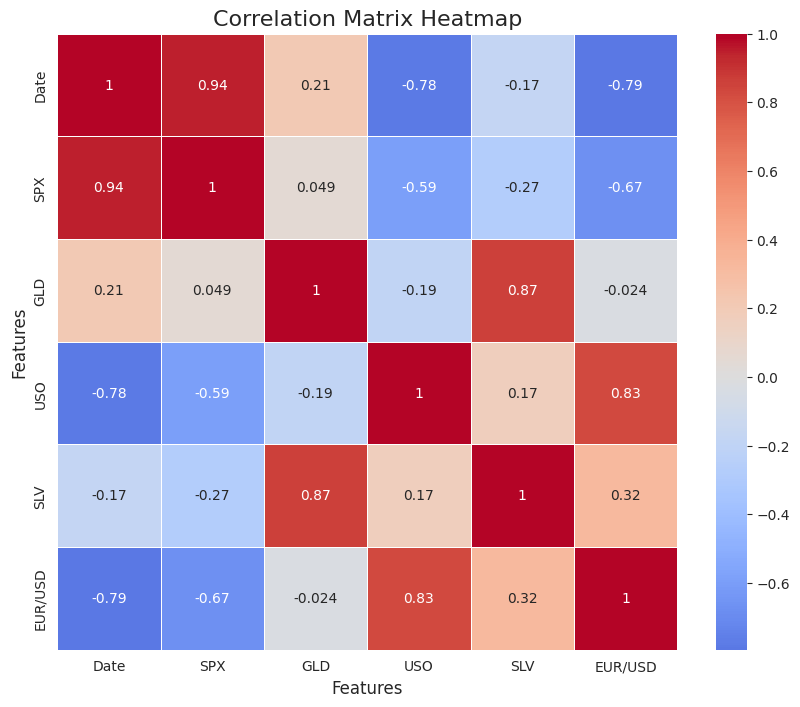

In [6]:
# Calculate the correlation matrix
correlation_matrix = gold_price.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, linewidths=0.5)

# Set title and axis labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show plot
plt.show()

The two columns, SLV and GLD, exhibit a strong correlation with each other compared to other columns. Therefore, we will drop the SLV column since the GLD column also shows a significant correlation with our target variable.

In [7]:
gold_price.drop("SLV", axis=1, inplace=True)

In [8]:
gold_price

,Date,SPX,GLD,USO,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,1.557099
...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,1.186789
2286,2018-05-09,2697.790039,124.330002,14.370000,1.184722
2287,2018-05-10,2723.070068,125.180000,14.410000,1.191753
2288,2018-05-14,2730.129883,124.489998,14.380000,1.193118


## C. Checking for Duplicate Data

In [9]:
gold_price.duplicated().sum()

0

No duplicates

# 6. Exploratory Data Analysis

## Data Wrangling

In [10]:
gold_price.set_index("Date", inplace=True)

- This transformation is useful for time series analysis, making it easier to perform operations based on dates.
- It modifies the DataFrame in place, meaning the original DataFrame is updated without creating a new one.

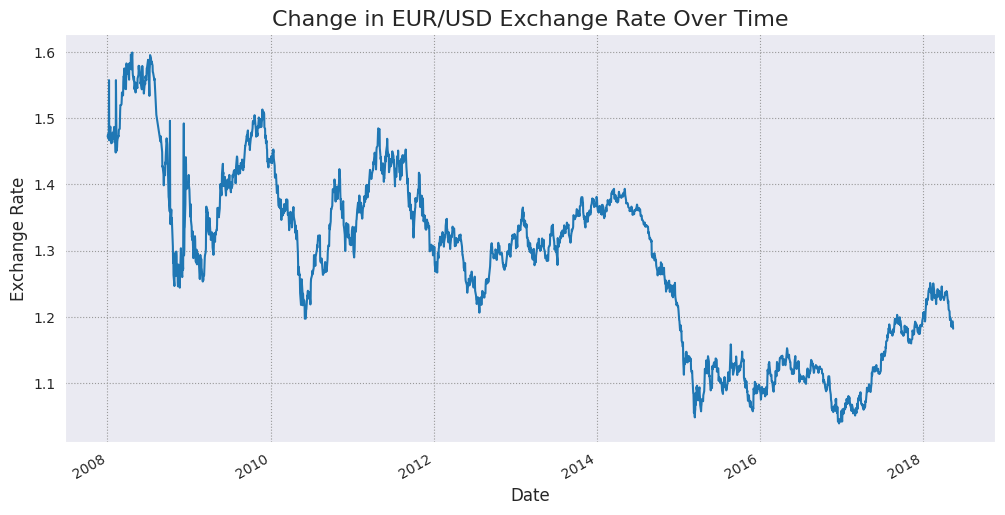

In [11]:
# Plot the EUR/USD exchange rate over time
plt.figure(figsize=(12, 6))
gold_price["EUR/USD"].plot()

# Set title and axis labels
plt.title("Change in EUR/USD Exchange Rate Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Exchange Rate", fontsize=12)

# Show plot
plt.grid(True)
plt.show()

This graph does not provide clear insights into the changes in the price of gold due to its noisy appearance. To better observe the trend, we need to smooth the data.

To visualize the trend in the data, we need to apply a smoothing process to the noisy line. There are several methods to achieve this. In our project, we will use the pandas rolling function to calculate the average of the previous 20 data points, also known as the Moving Average.

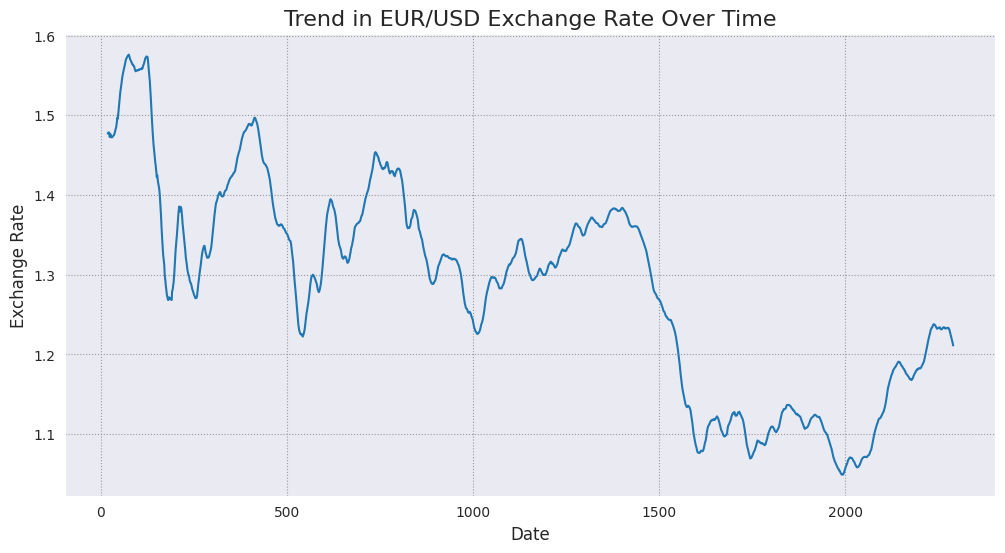

In [12]:
# Apply rolling mean with a window size of 20
gold_price["price_trend"] = gold_price["EUR/USD"].rolling(window=20).mean()

# Reset the index to the Date column
gold_price.reset_index(inplace=True)

# Plot the price trend, excluding the first 19 rows with NaN values
plt.figure(figsize=(12, 6))
gold_price["price_trend"].iloc[19:].plot()

# Set title and axis labels
plt.title("Trend in EUR/USD Exchange Rate Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Exchange Rate", fontsize=12)

# Show plot with grid
plt.grid(True)
plt.show()

The graph is now less noisy, allowing us to better analyze the trend in the change of gold prices.

## Distribution  of Columns

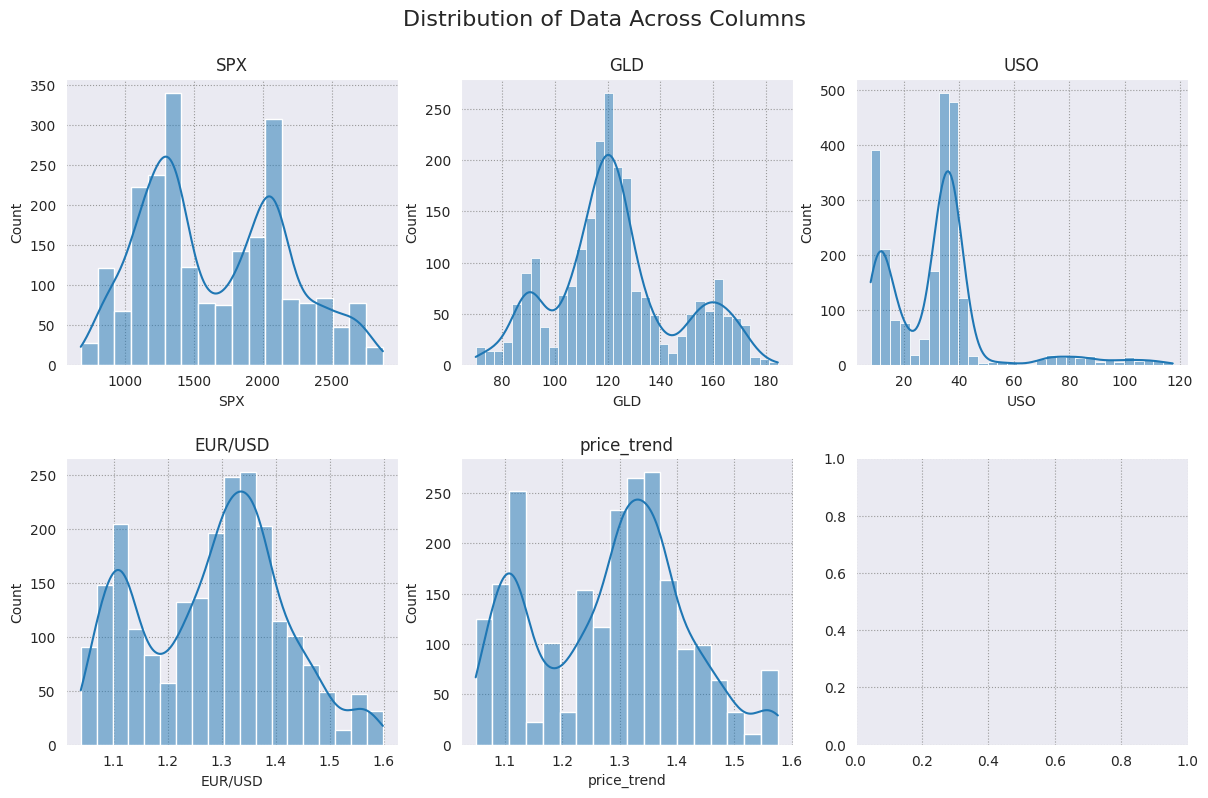

In [13]:
# Initialize the figure with a specified size
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Set the suptitle of the graph
fig.suptitle('Distribution of Data Across Columns', fontsize=16)

# List of columns to plot
columns = gold_price.drop("Date", axis=1).columns.tolist()

# Loop through each column and create a histogram
for i, column in enumerate(columns):
    row, col = divmod(i, 3)
    sns.histplot(data=gold_price, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(column, fontsize=12)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96], pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

The data distribution looks good

Check the skewness of each column

In [14]:
# Calculate skewness along the index axis, excluding the Date column
skewness = gold_price.drop(columns=["Date"]).skew(axis=0, skipna=True)

print("Skewness of each column:\n", skewness)

Skewness of each column:
 SPX            0.300362
GLD            0.334138
USO            1.699331
EUR/USD       -0.005292
price_trend   -0.029588
dtype: float64


### Insights from Skewness Output:
- **SPX (0.30)**: Slightly positively skewed.
- **GLD (0.33)**: Slightly positively skewed.
- **USO (1.70)**: Highly positively skewed, indicating potential outliers.
- **EUR/USD (-0.01)**: Nearly symmetric.
- **price_trend (-0.03)**: Almost symmetric.

### Observations:
- `USO` shows high positive skewness, which may need transformation.
- Other columns are relatively symmetric.

## Plotting Boxplot to Visualize the Outliers

Boxplots are highly effective for visualizing the spread and skewness of data. They are also useful for identifying individual outlier data points. The box represents the interquartile range (IQR), which includes data points between the 25th and 75th percentiles. The line inside the box indicates the median, and the whiskers extend to the minimum and maximum values within 1.5 times the IQR, excluding outliers.

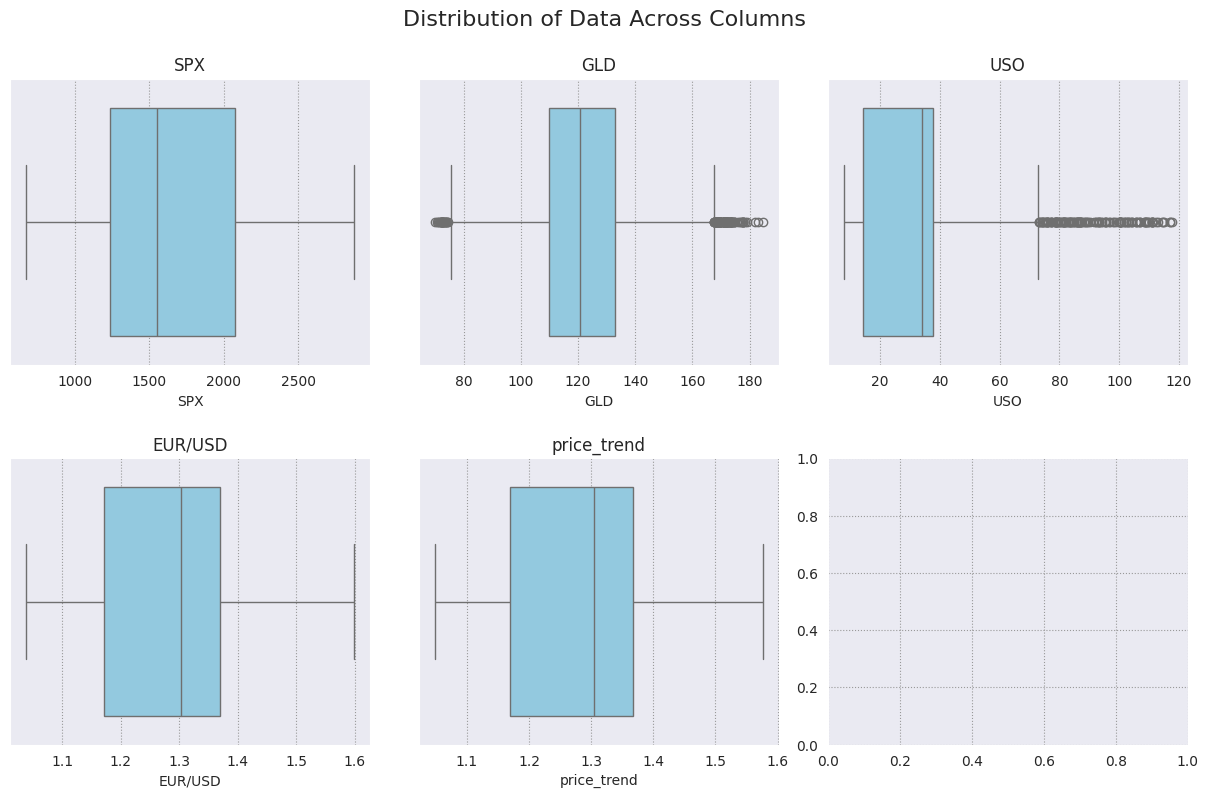

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

fig.suptitle('Distribution of Data Across Columns', fontsize=16)

columns = gold_price.drop("Date", axis=1).columns.tolist()

# Loop through each column and create a boxplot
for i, column in enumerate(columns):
    row, col = divmod(i, 3)
    sns.boxplot(data=gold_price, x=column, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(column, fontsize=12)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96], pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

It is clear that `USO` has outliers.

### Create a function to normalize the outlier present in the column

In [16]:
def remove_outliers(column):
    # Define the upper and lower limits
    upper_limit = column.quantile(0.95)
    lower_limit = column.quantile(0.05)

    column = column.clip(lower=lower_limit, upper=upper_limit)

    return column

We have set the upper limit of the column to the 95th percentile and the lower limit to the 5th percentile. This means that data points greater than the 95th percentile are capped at the 95th percentile value, and data points lower than the 5th percentile are capped at the 5th percentile value.

### Apply the remove_outliers function to each of the rows of the columns

In [17]:
gold_price[['SPX', 'GLD', 'USO', 'EUR/USD']] = \
    gold_price[['SPX', 'GLD', 'USO', 'EUR/USD']].apply(remove_outliers)

# 7. Data Preparation

## Splitting the Data

In [18]:
# Select the features and target variable
X = gold_price.drop(columns=['Date', 'EUR/USD'])
y = gold_price['EUR/USD']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We first drop the `Date` and target variable columns, storing the remaining data in the variable `X` as our independent variables. The target variable is stored in the `y` variable. We then split the data into training and testing sets in an 80:20 ratio.

## Scaling the Data

The formula for standardizing data using the `StandardScaler` is:

$$ z = \frac{x - \mu}{\sigma} $$

Where:
- $ z $ is the standardized value.
- $ x $ is the original value.
- $ \mu $ is the mean of the training samples.
- $ \sigma $ is the standard deviation of the training samples.

This formula transforms the data to have a mean of 0 and a standard deviation of 1 [Function to Standardize Python Data](https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python).

In [19]:
scaler = StandardScaler()

# Fit the StandardScaler on the training dataset and transform both training and testing datasets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
x_train_scaled

array([[-0.49053087,  1.6871927 ,  0.30375479, -0.40773649],
       [ 0.84612437, -0.0929812 , -1.1364261 , -1.21660628],
       [-0.8249732 , -1.28126102,  2.76044566,  2.19240226],
       ...,
       [-0.3136322 ,  1.3315172 ,  0.13961648,  0.47790774],
       [ 0.29269232, -0.15764962,  0.125497  ,  0.51668046],
       [-0.79384235,  1.95588095,  0.45612687,  0.50785653]])

In [21]:
x_test_scaled

array([[ 1.84593264, -0.02921117, -1.13348456, -0.88151825],
       [ 0.18296859,  0.31119525,  0.23139282,  0.5847219 ],
       [ 0.16822888,  0.18006273,  0.28728202,  0.54062423],
       ...,
       [-1.51429973, -1.30775724,  0.13667499,  0.46373343],
       [-1.42749842, -1.2008747 ,  0.39023612,  0.71643772],
       [-0.34261482,  1.40875992,  0.12667362,  0.46682784]])

# 8. Model Development and Model Evaluation

### Formula of R-squared and MSE

#### R-squared (R²) for Training Data
The formula for R-squared on the training data is:
$$ R^2_{\text{train}} = 1 - \frac{SS_{\text{res, train}}}{SS_{\text{tot, train}}} $$

Where:
- $ SS_{\text{res, train}} $ is the sum of squares of residuals for the training data.
- $ SS_{\text{tot, train}} $ is the total sum of squares for the training data.


#### R-squared (R²) for Test Data
The formula for R-squared on the test data is:
$$ R^2_{\text{test}} = 1 - \frac{SS_{\text{res, test}}}{SS_{\text{tot, test}}} $$

Where:
- $ SS_{\text{res, test}} $ is the sum of squares of residuals for the test data.
- $ SS_{\text{tot, test}} $ is the total sum of squares for the test data.

#### Mean Squared Error (MSE)

Mean Squared Error (MSE) is a common metric used to evaluate the performance of regression models. It measures the average squared difference between the actual and predicted values.

The formula for MSE is:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Where:
- $ y_i $ is the actual value.
- $ \hat{y}_i $ is the predicted value.
- $ n $ is the number of data points.


## A. Lasso Regression

### Lasso Regression Formula

Lasso Regression, or Least Absolute Shrinkage and Selection Operator, is a type of linear regression that uses L1 regularization. The objective function for Lasso Regression is:

$$ \text{minimize} \left( \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j| \right) $$

Where:
- $ y_i $ is the actual value.
- $ \hat{y}_i $ is the predicted value.
- $ n $ is the number of data points.
- $ \alpha $ is the regularization parameter.
- $ \beta_j $ are the coefficients of the model.
- $ p $ is the number of features.

### Description

Lasso Regression aims to minimize the sum of the squared residuals (the difference between the actual and predicted values) while also applying a penalty to the absolute values of the coefficients. This penalty term helps to shrink some coefficients to zero, effectively performing feature selection and reducing the complexity of the model.

The regularization parameter $ \alpha $ controls the strength of the penalty. A higher value of $ \alpha $ increases the penalty, leading to more coefficients being shrunk to zero. Conversely, a lower value of $ \alpha $ reduces the penalty, making the model more similar to ordinary least squares regression.

### Code

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

imputer = SimpleImputer(strategy='mean')

x_train_scaled = imputer.fit_transform(x_train_scaled)
x_test_scaled = imputer.transform(x_test_scaled)

# Create a PolynomialFeatures object of degree 2
poly = PolynomialFeatures(degree=2)

lasso = Lasso()

param_grid = {'lasso__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40]}
pipeline = make_pipeline(poly, lasso)
lasso_grid_search = GridSearchCV(pipeline, param_grid, scoring='r2', cv=3)
lasso_grid_search.fit(x_train_scaled, y_train)

# Predict the target variable using the fitted model and the test data
y_pred_train = lasso_grid_search.predict(x_train_scaled)
y_pred_test = lasso_grid_search.predict(x_test_scaled)

# Compute the R-squared of the fitted model on the train and test data
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("R-squared (train): ", r2_train)
print("R-squared (test): ", r2_test)
print('')
print("Mean Squared Error (train): ", mse_train)
print("Mean Squared Error (test): ", mse_test)
print('')
print('Best parameter values: ', lasso_grid_search.best_params_)
print('Best score: ', lasso_grid_search.best_score_)

R-squared (train):  0.9684811019451044
R-squared (test):  0.9609210669970879

Mean Squared Error (train):  0.0004920339403145819
Mean Squared Error (test):  0.0006119515371597247

Best parameter values:  {'lasso__alpha': 0.0001}
Best score:  0.9675368417416342


## B. RandomForestRegressor for Regression

### RandomForestRegressor Formula

RandomForestRegressor is an ensemble learning method for regression that operates by constructing multiple decision trees during training and outputting the mean prediction of the individual trees. The formula for the prediction of a RandomForestRegressor is:

$$ \hat{y} = \frac{1}{T} \sum_{t=1}^{T} \hat{y}_t $$

Where:
- $ \hat{y} $ is the final prediction.
- $ T $ is the number of trees in the forest.
- $ \hat{y}_t $ is the prediction of the $ t $-th tree.

### Description

RandomForestRegressor works by creating a multitude of decision trees at training time and outputting the average prediction of the individual trees. It reduces overfitting by averaging multiple trees, which improves the model's generalization ability. The key parameters of RandomForestRegressor include:
- **n_estimators**: The number of trees in the forest.
- **max_depth**: The maximum depth of the trees.
- **random_state**: Controls the randomness of the bootstrapping of the samples used when building trees.
- **n_jobs**: The number of jobs to run in parallel for both fit and predict.

### Code

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

param_grid = {
    'n_estimators': [50, 80, 100],
    'max_depth': [3, 5, 7]
}

rf = RandomForestRegressor()
rf_grid_search = GridSearchCV(rf, param_grid, scoring='r2', cv=2)
rf_grid_search.fit(x_train_scaled, y_train)

y_pred_train = rf_grid_search.predict(x_train_scaled)
y_pred_test = rf_grid_search.predict(x_test_scaled)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('Best parameter values: ', rf_grid_search.best_params_)
print('Best score: ', rf_grid_search.best_score_)
print('')
print("R-squared (train): ", r2_train)
print("R-squared (test): ", r2_test)
print('')
print("Mean Squared Error (train): ", mse_train)
print("Mean Squared Error (test): ", mse_test)

Best parameter values:  {'max_depth': 7, 'n_estimators': 100}
Best score:  0.9770427791859109

R-squared (train):  0.9853448468612149
R-squared (test):  0.9753603891969073

Mean Squared Error (train):  0.0002287780725148166
Mean Squared Error (test):  0.00038584082387424333


### Feature Importance Graph

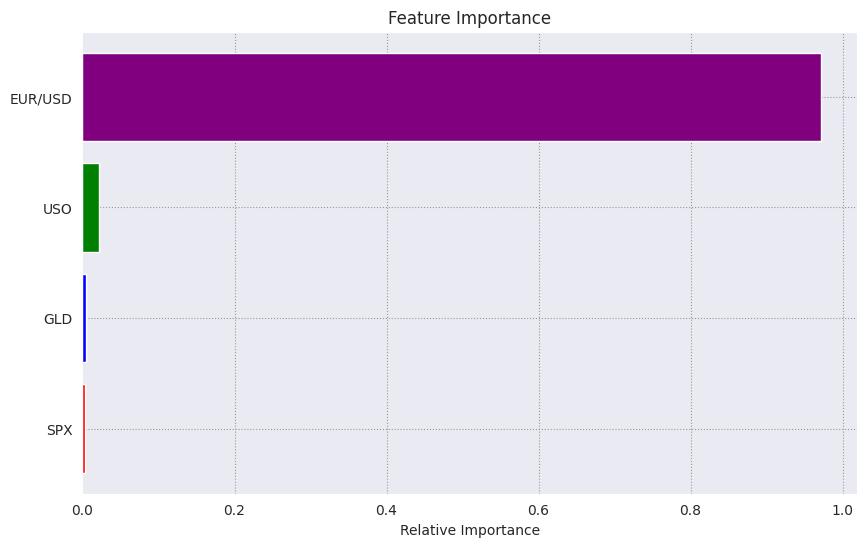

In [24]:
features = gold_price.drop("Date", axis=1).columns

importances = rf_grid_search.best_estimator_.feature_importances_

indices = np.argsort(importances)

colors = ['red', 'blue', 'green', 'purple']

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')

# Plot the horizontal bar chart with different colors
plt.barh(range(len(indices)),
         importances[indices],
         color=[colors[i % len(colors)] for i in range(len(indices))],
         align='center')

# Set the y-ticks with the feature names
plt.yticks(range(len(indices)),
           [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The feature importance graph indicates that the `USO` column has a significant impact, more than twice as much as other features, in determining the gold price in `USD`.

## C. XGBoost Model for Regression

#### XGBoost Model for Regression Formula

XGBoost (Extreme Gradient Boosting) is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework. The objective function for XGBoost in regression is:

$$ \text{minimize} \left( \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k) \right) $$

Where:
- $ l(y_i, \hat{y}_i) $ is the loss function that measures the difference between the actual value $ y_i $ and the predicted value $ \hat{y}_i $.
- $ \Omega(f_k) $ is the regularization term that penalizes the complexity of the model to prevent overfitting.
- $ n $ is the number of data points.
- $ K $ is the number of trees.
- $ f_k $ represents the individual trees in the model.

#### Description

XGBoost works by building an ensemble of decision trees, where each tree corrects the errors of the previous ones. The model is trained in an additive manner, meaning that new trees are added to the ensemble sequentially to improve the overall prediction accuracy.

The key components of the XGBoost model include:
- **Loss Function**: Measures how well the model's predictions match the actual values. Common loss functions for regression include Mean Squared Error (MSE) and Mean Absolute Error (MAE).
- **Regularization Term**: Helps to control the complexity of the model and prevent overfitting by penalizing large coefficients.
- **Learning Rate**: Controls the contribution of each tree to the final model. A lower learning rate requires more trees to be added to the model.
- **Tree Structure**: Defines the depth and number of leaves in each tree. Deeper trees can capture more complex patterns but are also more prone to overfitting.

#### Code

In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

model_xgb = XGBRegressor()

grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)

grid_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_

best_model_xgb = XGBRegressor(**best_params)
best_model_xgb.fit(x_train_scaled, y_train)

# Predict
y_pred_train = best_model_xgb.predict(x_train_scaled)
y_pred_test = best_model_xgb.predict(x_test_scaled)

# Evaluate
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Best Parameters: ", best_params)
print("R-squared (train): ", r2_train)
print("R-squared (test): ", r2_test)
print()
print("Mean Squared Error (train): ", mse_train)
print("Mean Squared Error (test): ", mse_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
R-squared (train):  0.9997376396433267
R-squared (test):  0.9852577428747992

Mean Squared Error (train):  4.095644455953784e-06
Mean Squared Error (test):  0.0002308544838800552


In [26]:
import pickle

pickle.dump(model_xgb, open('model.pkl', 'wb'))

# Conclusions

Predicting gold prices using various machine learning techniques. Multiple algorithms, including Linear Regression, Random Forest, and XGBoost, have been implemented to compare their performance and identify the most accurate model. The data preprocessing steps include handling missing values, scaling the data, and removing outliers. Additionally, exploratory data analysis has been performed to understand the data distribution and correlations. The models are evaluated using metrics like R-squared and Mean Squared Error (MSE), with Random Forest and XGBoost showing promising results as the best model. The final model is saved for future use, providing a reliable tool for predicting gold prices and aiding investment decisions.